In [2]:
import numpy as np
from scipy.io import loadmat

cl_data = loadmat(file_path)['data'][0, 0]

spike_times = cl_data['spike_times'].squeeze()
tags = cl_data['tags'].squeeze()
tag_times = cl_data['time_for_each_tag'].squeeze()

In [3]:
def find_section_indices(tags, start_tag, end_tag):
    sections = []
    idx = 0
    while idx < len(tags):
        if tags[idx] == start_tag:
            end_idx = np.where(tags[idx:] == end_tag)[0][0] + idx
            sections.append((idx, end_idx))
            idx = end_idx + 1
        else:
            idx += 1
    return sections

In [4]:
def extract_trials(start, end, tags, tag_times):
    events = list(zip(tags[start:end+1], tag_times[start:end+1]))
    trials = []
    i = 0
    while i < len(events)-2:
        if events[i][0] == 100 and events[i+1][0] == 200 and events[i+2][0] == 223:
            onset_time = events[i][1]
            end_time = events[i+2][1]
            trials.append((onset_time, end_time))
            i += 3
        else:
            i += 1
    return trials

In [5]:
def compute_firing_rates(spike_times, trials, fs=30000):
    rates = []
    for onset, end in trials:
        count = np.sum((spike_times >= onset) & (spike_times <= end))
        duration_sec = (end - onset) / fs
        rates.append(count / duration_sec)
    return np.array(rates)

In [6]:
def compute_mean_firing_rates(start_tag, end_tag):
    secs = find_section_indices(tags, start_tag, end_tag)

    all_sec_rates = []
    for start, end in secs:
        trials = extract_trials(start, end, tags, tag_times)
        rates = compute_firing_rates(spike_times, trials)
        all_sec_rates.append(np.mean(rates))
        
    return all_sec_rates

In [7]:
main_means = compute_mean_firing_rates(start_tag=226, end_tag=227)[:-1]
aux_means = compute_mean_firing_rates(start_tag=228, end_tag=229)

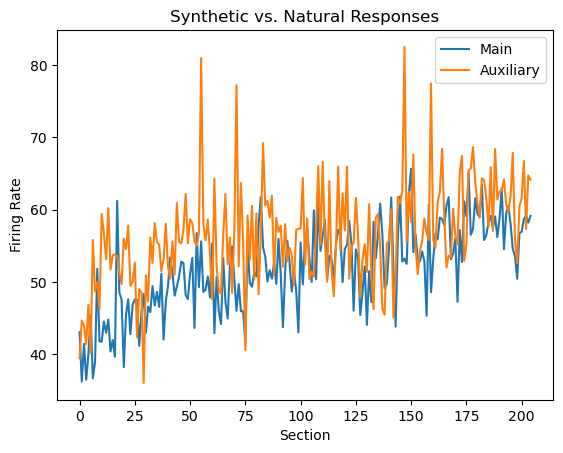

In [8]:
import matplotlib.pyplot as plt

plt.plot(main_means, label="Main")
plt.plot(aux_means, label="Auxiliary")
plt.xlabel("Section")
plt.ylabel("Firing Rate")
plt.title('Synthetic vs. Natural Responses')
plt.legend()
plt.savefig('responses.pdf', bbox_inches='tight')
plt.show()